In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
data = pd.read_csv("Salary Data.csv")
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
369,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
370,43.0,Male,Master's,Director of Operations,19.0,170000.0
371,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
372,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [24]:
x = data.iloc[:,4]
y = data.iloc[:,-1]

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [26]:
class OLS:
    x_mean = 0
    y_mean = 0
    beta_0 = 0
    beta_1 = 0
    
    def fit(self, x_train, y_train):
        x_mean = np.mean(x_train)
        y_mean = np.mean(y_train)
        
        x_minus_x_mean = x_train - x_mean
        y_minus_y_mean = y_train - y_mean
        
        prod = x_minus_x_mean*y_minus_y_mean
        prod_sum = np.sum(prod)
        
        x_minus_x_mean_WSQ = np.square(x_minus_x_mean)
        
        x_minus_x_mean_WSQ_sum = np.sum(x_minus_x_mean_WSQ)
        
        self.beta_1 = prod_sum/x_minus_x_mean_WSQ_sum
        self.beta_0 = y_mean - (self.beta_1*x_mean)
        
        return self.beta_1, self.beta_0
    
    def predict(self, x_test):
        y_pred = []
        for i in x_test:
            y_pred.append(self.beta_0 + (self.beta_1*i))
        return np.array(y_pred)

In [27]:
predictor = OLS()
coeff = predictor.fit(x_train, y_train)
y_pred = predictor.predict(x_test)

In [28]:
coeff

(6720.23737960371, 33339.59850226411)

In [29]:
y_pred

array([ 66940.78540028, 100541.9722983 , 147583.63395553, 100541.9722983 ,
       107262.2096779 ,  80381.26015949, 154303.87133513, 167744.34609434,
       100541.9722983 ,  53500.31064108,  87101.49753909,  46780.07326147,
        43419.95457167,  66940.78540028,  46780.07326147,  46780.07326147,
       140863.39657592, 113982.44705751, 174464.58347394,  53500.31064108,
       113982.44705751, 161024.10871473,  60220.54802068, 140863.39657592,
       134143.15919632, 167744.34609434,  80381.26015949,  53500.31064108,
        46780.07326147,  66940.78540028,  53500.31064108,  46780.07326147,
       140863.39657592, 167744.34609434,  73661.02277989, 161024.10871473,
       147583.63395553,  73661.02277989, 113982.44705751,  93821.7349187 ,
        87101.49753909,  53500.31064108, 113982.44705751, 134143.15919632,
        80381.26015949, 154303.87133513, 120702.68443711,  33339.59850226,
       140863.39657592, 161024.10871473, 134143.15919632, 120702.68443711,
       154303.87133513,  

In [30]:
y_test

67      45000.0
318    120000.0
275    160000.0
260    120000.0
90     120000.0
         ...   
78     180000.0
175     85000.0
268    110000.0
331    160000.0
82      30000.0
Name: Salary, Length: 75, dtype: float64

In [31]:
from sklearn.metrics import mean_squared_error
a = mean_squared_error(y_test, y_pred)
a

242931056.39934912

In [32]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.9038778296341599

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


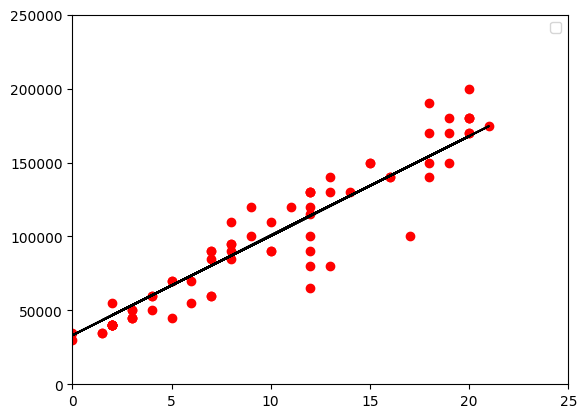

In [21]:
plt.plot(x_test, y_pred, c='black')
plt.scatter(x_test, y_test, c='red')
plt.xlim(0.0, 25.0)
plt.ylim(0.0, 250000.0)
plt.legend()
plt.show()